## Let's play!

In [1]:
from wildcatter.advanced_environment_for_RLib import AdvancedDriller
import numpy as np
import matplotlib.pyplot as plt

## Setting environment config dictionary

Here we list the config dictionaries for various environment types, selecting the one we want to train for.

In [2]:
env_random_config = dict(model_type = "random",
                  nrow=11,
                  ncol=40,
                  available_pipe=30,
                  available_wells=2,
                  oil_price = 40,
                  relocation_cost = 0.2,
                  drilling_cost = 0.5,
                  drilling_depth_markup = 0.1,
                  seed = 0,
                 )

env_random_pockets_config = dict(model_type = "random_pockets",
                  nrow=11,
                  ncol=40,
                  available_pipe=30,
                  available_wells=3,
                  oil_price = 1,
                  relocation_cost = 0.2,
                  drilling_cost = 0.5,
                  drilling_depth_markup = 0.1,
                  seed = 0,
                 )

env_2d_from_csv_config = dict(model_type = "from_csv",
                  #model_path=r"/home/studio-lab-user/sagemaker-studiolab-notebooks/wildcatter-ThreeAmigos/examples/data/2d_two_rectangular_targets.csv",
                  #model_path=r"/home/studio-lab-user/sagemaker-studiolab-notebooks/wildcatter-ThreeAmigos/examples/data/2d_stacked.csv",
                  model_path=r"/home/studio-lab-user/sagemaker-studiolab-notebooks/wildcatter-ThreeAmigos/examples/data/x-sec_targets.csv",
                  delim=",",
                  available_pipe=30,
                  available_wells=2,
                  oil_price = 40,
                  relocation_cost = 0.2,
                  drilling_cost = 0.5,
                  drilling_depth_markup = 0.1,
                  seed = 0,
                  )

env_config = env_random_pockets_config
env = AdvancedDriller(env_config)

## Starting the game

Here we reset the environment. Dark colors mark faults and impassable borders. Green is unimportant rock. Shades of yellow are productive rock.

Beginning Drill Campaign. Here's the initial model.


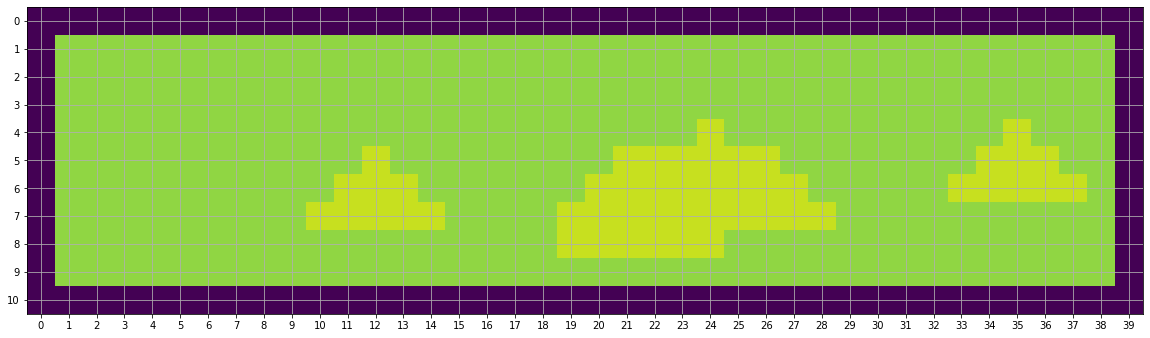

Valid actions: [ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


In [3]:
print("Beginning Drill Campaign. Here's the initial model.")
obs = env.reset()
done = False
score = 0
all_actions = np.arange(env._size_action_space)
plt.figure(figsize=(20, 20))
plt.imshow(env.state, vmin=-10, vmax=2)
plt.xticks(np.arange(0, env.ncol, 1.0))
plt.yticks(np.arange(0, env.nrow, 1.0))
plt.xlim([-0.5, env.ncol - 0.5])
plt.ylim([env.nrow - 0.5, -0.5])
plt.grid()
plt.show()
permissible_actions = env.action_masks()
print("Valid actions:",all_actions[permissible_actions])

The last output from the previous cell should be a list of valid actions.
Remember that the actions are:
- 0: drill down,
- 1: drill left,
- 2: drill up,
- 3: drill right,
- 4 to env._size_action_space - 2: start a new well at column number (action - 3),
- env._size_action_space - 1 (i.e., the last action): stop drilling current well. If no wells are active: stop drilling campaign and sell all the oil extracted.


Choose the action you want, update its value in the cell below and run it.

The figure below shows a state where three actions (27, then 0 for three times) have been taken, establishing a well and drilling into the subsurface. The darker shade of green shows the current dril bit location!

Reward: -0.8
Valid actions: [ 0  1  3 42]


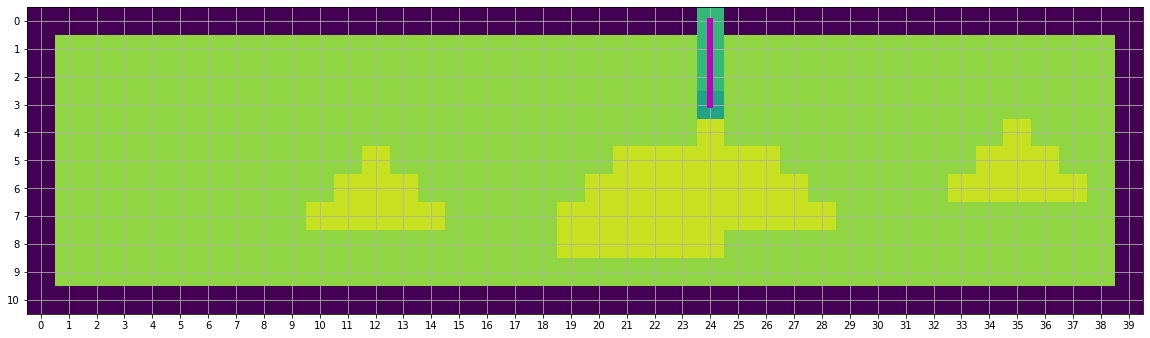

In [7]:
action = 0

if action in all_actions[permissible_actions]:
    obs, reward, done, info = env.step(action)
    score += reward

    plt.figure(figsize=(20, 20))
    plt.imshow(env.state, vmin=-10, vmax=2)
    plt.xticks(np.arange(0, env.ncol, 1.0))
    plt.yticks(np.arange(0, env.nrow, 1.0))
    plt.xlim([-0.5, env.ncol - 0.5])
    plt.ylim([env.nrow - 0.5, -0.5])
    for well in env.trajectory:
        traj_z, traj_x = np.asarray(well).T
        plt.plot(traj_x, traj_z, "-", c="m", linewidth=6)
    plt.grid()

    print("Reward:",reward)
    if done:
        print("Game over. Your score:", score)
    else:
        permissible_actions = env.action_masks()
        print("Valid actions:",all_actions[permissible_actions])
else:
    print("Invalid action! Try again.")
    print("The set of valid actions is:", all_actions[permissible_actions])